#### K-Means   k-평균 - 비지도 학습 - 군집(Cluster)
```
초기 중심점 설정 (Centroid)
데이터 할당(Assignment)
중심점 업데이트(Update)
```

```
CUST_ID	신용카드 사용자 식별자 (범주형 데이터)
BALANCE	사용자가 구매를 위해 계좌에 남겨놓은 잔액
BALANCE_FREQUENCY	잔액이 얼마나 자주 업데이트되는지를 나타내는 점수 (0 ~ 1 사이, 1에 가까울수록 자주 업데이트됨)
PURCHASES	계좌를 통해 이루어진 총 구매 금액
ONEOFF_PURCHASES	한 번에 이루어진 최대 금액의 구매
INSTALLMENTS_PURCHASES	할부로 이루어진 구매 금액 총합
CASH_ADVANCE	사용자가 받은 선불 현금 금액
PURCHASES_FREQUENCY	얼마나 자주 구매가 이루어졌는지를 나타내는 점수 (0 ~ 1 사이)
ONEOFFPURCHASESFREQUENCY	한 번에 이루어지는 구매의 빈도 (0 ~ 1 사이)
PURCHASESINSTALLMENTSFREQUENCY	할부 구매가 얼마나 자주 이루어졌는지를 나타내는 빈도 점수 (0 ~ 1 사이)
CASHADVANCEFREQUENCY	선불 현금 인출이 얼마나 자주 이루어졌는지 (0 ~ 1 사이)
CASHADVANCETRX	선불 현금 인출 거래 횟수
PURCHASES_TRX	총 구매 거래 횟수
CREDIT_LIMIT	사용자에게 부여된 신용카드 한도
PAYMENTS	사용자가 지불한 총 금액
MINIMUM_PAYMENTS	사용자가 납부한 최소 금액
PRCFULLPAYMENT	전액 결제한 비율 (0 ~ 1 사이)
TENURE	사용자의 신용카드 사용 기간
```

In [2]:
# 카드사 고객 분석
import pandas as pd
df = pd.read_csv('CC-GENERAL.csv')
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [ ]:
%pip install missingno

<Axes: >

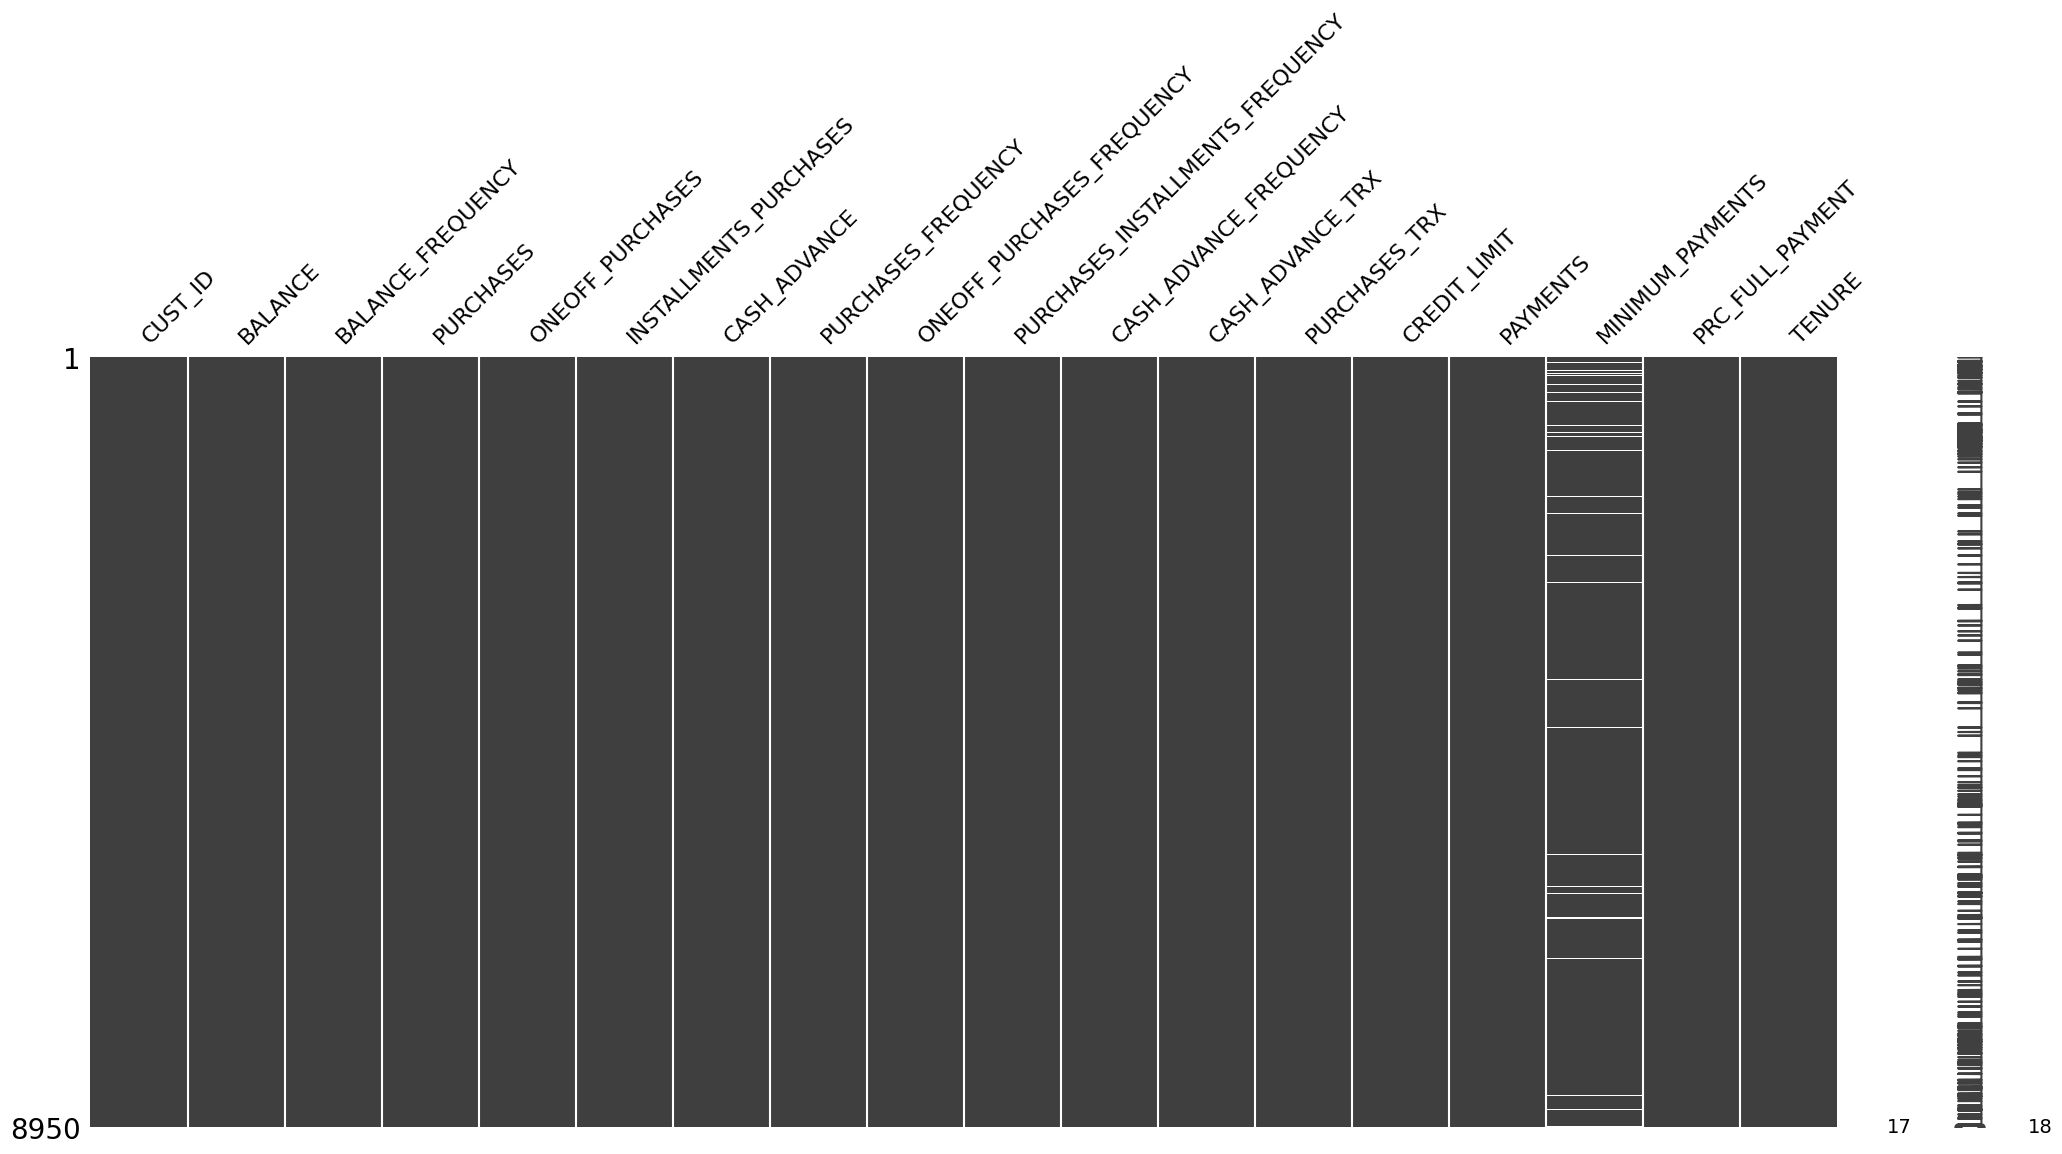

In [6]:
import missingno as msno
msno.matrix(df)

In [ ]:
credit_df = df.copy()
credit_df = credit_df.drop(columns=['CUST_ID'])
# credit_df = credit_df[~credit_df.CREDIT_LIMIT.isna()]
credit_df = credit_df.dropna(subset = ['CREDIT_LIMIT'])
credit_df.MINIMUM_PAYMENTS = credit_df.MINIMUM_PAYMENTS.fillna(   credit_df.MINIMUM_PAYMENTS.mean() )

# from sklearn.impute import SimpleImputer
# imputer = SimpleImputer(strategy='mean')
# imputer.fit_transform(credit_df)

(8949, 17)

In [ ]:
%pip install seaborn

<Axes: >

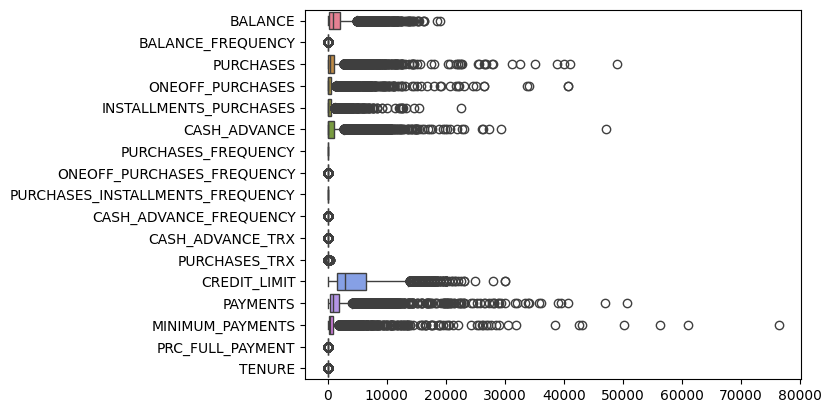

In [28]:
# 이상치여부 확인하기 - boxplot
import seaborn as sns
sns.boxplot(data=credit_df,orient='h')

In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(credit_df)
df_scaled[:3]

array([[-0.73205404, -0.24988139, -0.4249337 , -0.35695651, -0.34911414,
        -0.4668054 , -0.80664908, -0.67871619, -0.70740935, -0.67529446,
        -0.47608293, -0.51138082, -0.96037969, -0.52902627, -0.31099471,
        -0.52558844,  0.36054128],
       [ 0.78685815,  0.1340494 , -0.4695839 , -0.35695651, -0.45460688,
         2.6054375 , -1.22192823, -0.67871619, -0.91708951,  0.57394905,
         0.11003155, -0.59184052,  0.68860056,  0.81854607,  0.08926366,
         0.2341587 ,  0.36054128],
       [ 0.44704093,  0.51798018, -0.10771601,  0.10884332, -0.45460688,
        -0.4668054 ,  1.26974167,  2.67329468, -0.91708951, -0.67529446,
        -0.47608293, -0.10908229,  0.82601558, -0.38385745, -0.10170048,
        -0.52558844,  0.36054128]])

In [ ]:
%pip install tqdm

100%|██████████| 14/14 [00:00<00:00, 82.68it/s]


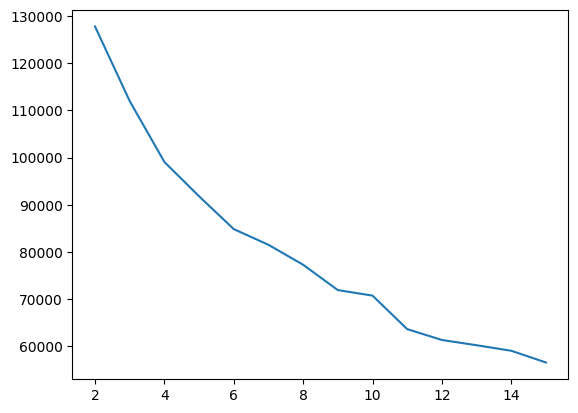

In [37]:
# 최적의 k 찾기  엘보우
from sklearn.cluster import KMeans
from tqdm import tqdm
import matplotlib.pyplot as plt
k_lists = []
for k in tqdm(range(2,16)):
    knn = KMeans(n_clusters=k)
    knn.fit(df_scaled)
    k_lists.append(knn.inertia_)   
plt.plot(range(2,16), k_lists)  
plt.show()


In [40]:
# k = 4
kmn = KMeans(n_clusters=4,random_state=42)
clusters = kmn.fit_predict(df_scaled)
credit_df['clusters'] = clusters

In [44]:
credit_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,clusters
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.304943,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1


In [45]:
# 클러터를 구분하는데 중요도 가 높은 컬럼 두개 찾기
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=3)
tree.fit(credit_df.drop(columns=['clusters']),  credit_df.clusters)
tree.feature_importances_

array([0.00902932, 0.        , 0.3087426 , 0.        , 0.        ,
       0.30372584, 0.        , 0.        , 0.        , 0.02474178,
       0.        , 0.03875148, 0.        , 0.        , 0.        ,
       0.        , 0.31500898])

In [ ]:
import numpy as np
top4 = np.argsort(tree.feature_importances_)[::-1][:4]
top4, credit_df.columns[top4]

(array([16,  2,  5, 11]),
 Index(['TENURE', 'PURCHASES', 'CASH_ADVANCE', 'PURCHASES_TRX'], dtype='object'))

In [ ]:
temp = credit_df.loc[:,credit_df.columns[top4] ]
temp['clusters'] = clusters
temp

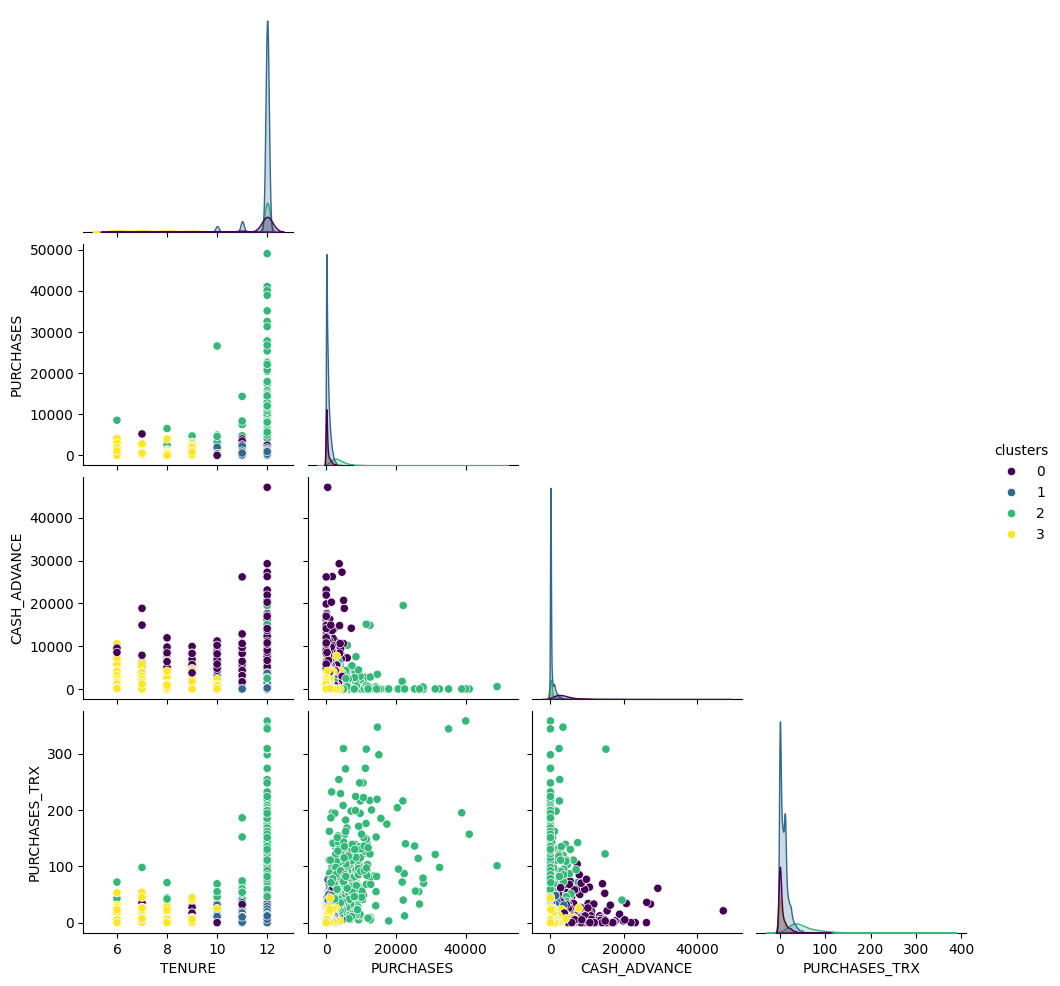

In [67]:
sns.pairplot(data = temp,hue='clusters' ,palette='viridis', corner=True)
plt.show()

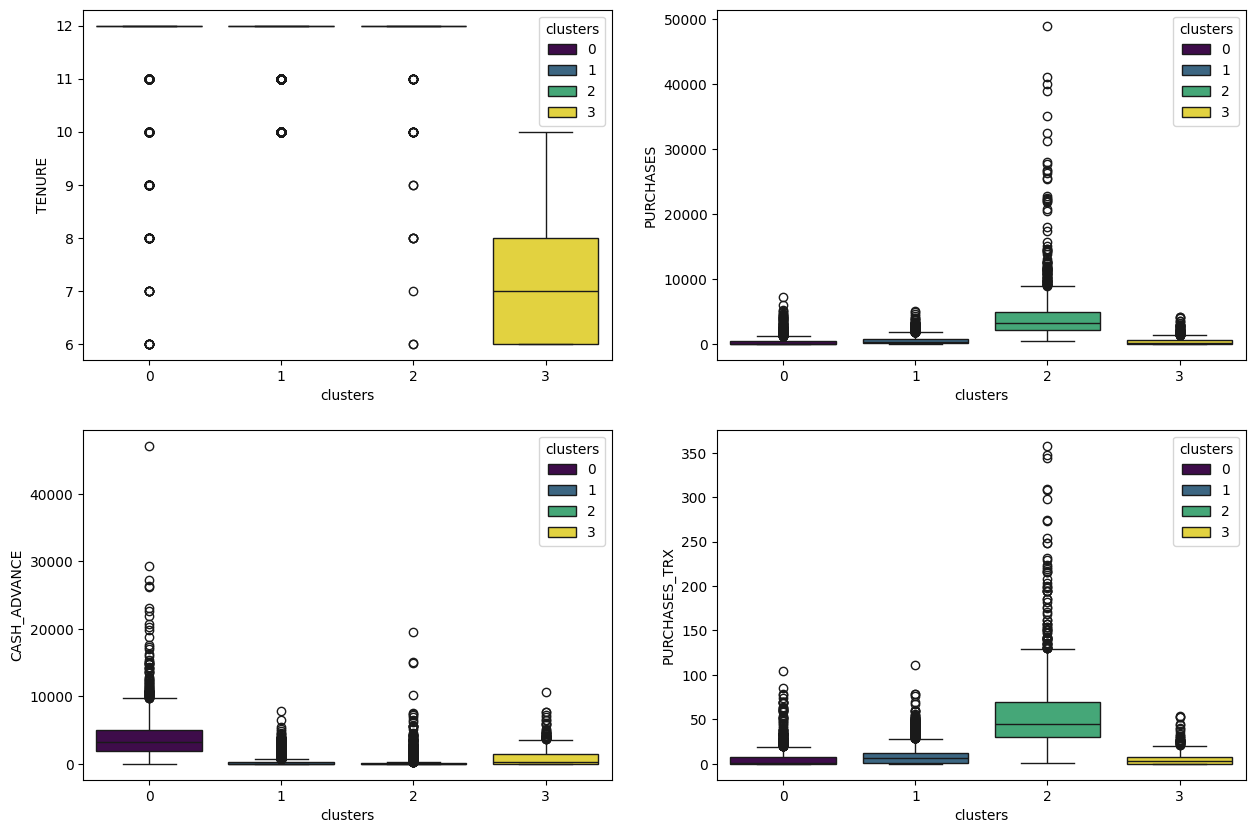

In [89]:
# boxplot
credit_df.columns[top4]
fig,ax = plt.subplots(2,2,figsize=(15,10))
ax = ax.flatten()
for i ,colname in enumerate(temp.columns):   
    if i != 4: 
        sns.boxplot(data=temp,x='clusters',hue='clusters',y=colname,palette='viridis',ax=ax[i])
    

In [ ]:
# 클러스터 0 1 2 박스가 맨위에 붙어있다... 이 그룹의 고객들은 대부분 만기 회원  --> 충성고객
# 3클러스터는 가입기간이 6~8 --> 상대적으로 신규 또는 중간가입기간

# 구매액 클러스터2  vvvip 그룹  나머지 클래스들은 총 구매액이 낮어

# 현금서비스 클러스터 0이 현금을 주로 사용하는 집단

# 구매횟수 클러스터 2번이 거래횟수가 많다 - 자주쓴다

